In [23]:
import os
os.chdir("/Users/laetitiabacha/Desktop/Year 4/Reinforcement for Bioengineers/figures")
print(os.getcwd())
NOTEBOOK_DIR = os.getcwd()

/Users/laetitiabacha/Desktop/YEAR 4/Reinforcement for Bioengineers/figures


In [65]:
%pip install -U pip
%pip install -U stable-baselines3 gymnasium numpy matplotlib pandas

python(90985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


python(90991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Using cached stable_baselines3-2.7.1-py3-none-any.whl.metadata (4.8 kB)
  Using cached gymnasium-1.2.3-py3-none-any.whl.metadata (10 kB)
  Using cached numpy-2.4.0-cp312-cp312-macosx_14_0_x86_64.whl.metadata (6.6 kB)
INFO: pip is looking at multiple versions of stable-baselines3 to determine which version is compatible with other requirements. This could take a while.
  Using cached stable_baselines3-2.7.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached stable_baselines3-2.6.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached gymnasium-1.1.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached stable_baselines3-2.5.0-py3-none-any.whl.metadata (4.8 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor

BASE_DIR = "ppo_cartpole_runs"
seed = 0

run_dir = os.path.join(BASE_DIR, f"seed_{seed}")
os.makedirs(run_dir, exist_ok=True)

env = Monitor(gym.make("CartPole-v1"), filename=os.path.join(run_dir, "monitor.csv"))
env.reset(seed=seed)
env.action_space.seed(seed)

model = PPO("MlpPolicy", env, seed=seed, verbose=1)
model.learn(total_timesteps=150_000)

model.save(os.path.join(run_dir, "model.zip"))
env.close()

print("Saved to:", run_dir)


Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.6     |
|    ep_rew_mean     | 21.6     |
| time/              |          |
|    fps             | 4207     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 28.7       |
|    ep_rew_mean          | 28.7       |
| time/                   |            |
|    fps                  | 2503       |
|    iterations           | 2          |
|    time_elapsed         | 1          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.00886423 |
|    clip_fraction        | 0.117      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.685     |
|    explained_variance   | -0.001

In [5]:
import os
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor

BASE_DIR = "ppo_cartpole_runs"
for seed in [1, 2]:
    run_dir = os.path.join(BASE_DIR, f"seed_{seed}")
    os.makedirs(run_dir, exist_ok=True)

    env = Monitor(gym.make("CartPole-v1"), filename=os.path.join(run_dir, "monitor.csv"))
    env.reset(seed=seed)
    env.action_space.seed(seed)

    model = PPO("MlpPolicy", env, seed=seed, verbose=1)
    model.learn(total_timesteps=150_000)

    model.save(os.path.join(run_dir, "model.zip"))
    env.close()

print("Seeds 1 and 2 done.")


Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.8     |
|    ep_rew_mean     | 20.8     |
| time/              |          |
|    fps             | 3802     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26.1        |
|    ep_rew_mean          | 26.1        |
| time/                   |             |
|    fps                  | 2409        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009770347 |
|    clip_fraction        | 0.116       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_varia

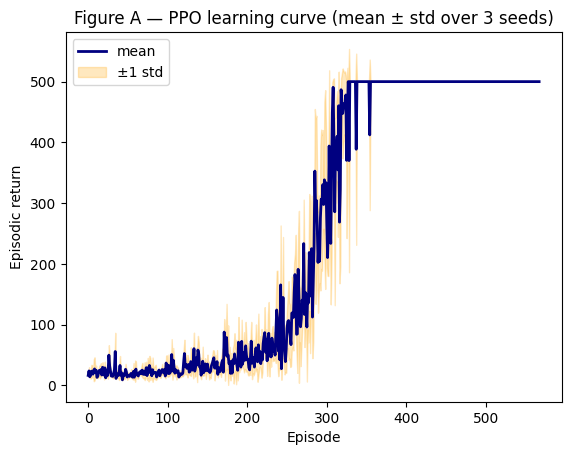

<Figure size 640x480 with 0 Axes>

In [41]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

BASE_DIR = "ppo_cartpole_runs"
SEEDS = [0, 1, 2]

rewards = []
for s in SEEDS:
    df = pd.read_csv(os.path.join(BASE_DIR, f"seed_{s}", "monitor.csv"), comment="#")
    rewards.append(df["r"].to_numpy())

min_len = min(len(r) for r in rewards)
R = np.stack([r[:min_len] for r in rewards])

mean = R.mean(axis=0)
std = R.std(axis=0)

plt.figure()

# pick colors here
line_color = "navy"
shade_color = "orange"

plt.plot(mean, color=line_color, linewidth=2, label="mean")
plt.fill_between(
    np.arange(min_len),
    mean - std,
    mean + std,
    color=shade_color,
    alpha=0.25,
    label="±1 std"
)

plt.xlabel("Episode")
plt.ylabel("Episodic return")
plt.title("Figure A — PPO learning curve (mean ± std over 3 seeds)")
plt.legend()
plt.show()

os.makedirs("figures", exist_ok=True)
plt.tight_layout()
plt.savefig("figures/figure_A.pdf", bbox_inches="tight")
plt.show()

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

BASE_DIR = "ppo_cartpole_runs"
SEEDS = [0, 1, 2]

dfs = []
for s in SEEDS:
    path = os.path.join(BASE_DIR, f"seed_{s}", "progress.csv")
    df = pd.read_csv(
        path,
        engine="python",       # more tolerant parser
        on_bad_lines="skip"    # skip malformed lines
    )
    df["seed"] = s
    dfs.append(df)

all_df = pd.concat(dfs, ignore_index=True)
print("Loaded:", all_df.shape)
print("Columns:", list(all_df.columns)[:20])

Loaded: (196, 17)
Columns: ['rollout/ep_len_mean', 'time/iterations', 'time/total_timesteps', 'time/fps', 'rollout/ep_rew_mean', 'time/time_elapsed', 'train/policy_gradient_loss', 'train/loss', 'train/explained_variance', 'train/clip_range', 'train/value_loss', 'train/learning_rate', 'train/entropy_loss', 'train/approx_kl', 'train/clip_fraction', 'train/n_updates', 'seed']


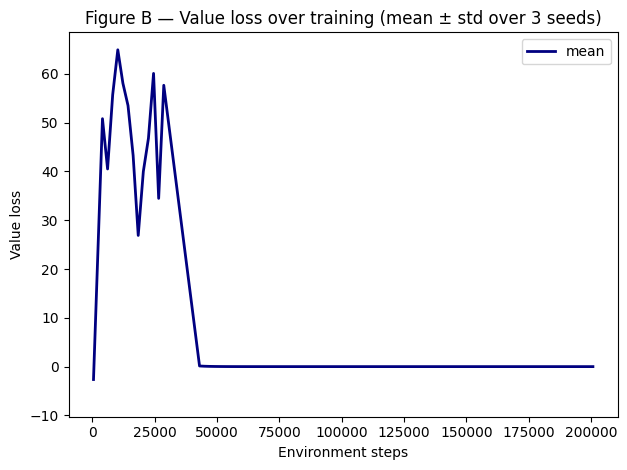

In [45]:
metric = "train/value_loss"
pivot = all_df.pivot_table(index="time/total_timesteps", columns="seed", values=metric)

x = pivot.index.values
mean = pivot.mean(axis=1).values
std  = pivot.std(axis=1).values

plt.figure()

plt.plot(x, mean, color="navy", linewidth=2, label="mean")
plt.fill_between(
    x,
    mean - std,
    mean + std,
#    color="orange",
#    alpha=0.25,
#   label="±1 std"
)

plt.xlabel("Environment steps")
plt.ylabel("Value loss")
plt.title("Figure B — Value loss over training (mean ± std over 3 seeds)")
plt.legend()

os.makedirs("figures", exist_ok=True)
plt.tight_layout()
plt.savefig("figures/figure_B.pdf", bbox_inches="tight")
plt.show()

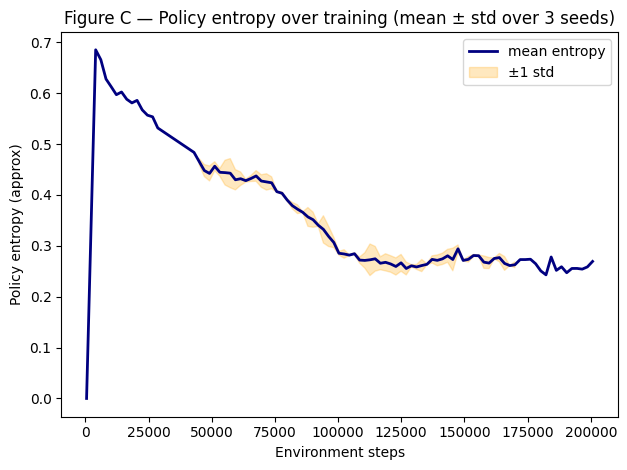

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

metric = "train/entropy_loss"

all_df[metric] = pd.to_numeric(all_df[metric], errors="coerce")
all_df["time/total_timesteps"] = pd.to_numeric(all_df["time/total_timesteps"], errors="coerce")
all_df = all_df.dropna(subset=[metric, "time/total_timesteps", "seed"])

pivot = all_df.pivot_table(index="time/total_timesteps", columns="seed", values=metric)

x = pivot.index.values

# SB3 logs entropy_loss as a negative quantity (it's -entropy term).
# For an intuitive plot: entropy ≈ -entropy_loss
entropy_mean = (-pivot).mean(axis=1).values
entropy_std  = (-pivot).std(axis=1).values

plt.figure()
plt.plot(x, entropy_mean, color="navy", linewidth=2, label="mean entropy")
plt.fill_between(x, entropy_mean-entropy_std, entropy_mean+entropy_std, color="orange", alpha=0.25, label="±1 std")

plt.xlabel("Environment steps")
plt.ylabel("Policy entropy (approx)")
plt.title("Figure C — Policy entropy over training (mean ± std over 3 seeds)")
plt.legend()

os.makedirs("figures", exist_ok=True)
plt.tight_layout()
plt.savefig("figures/figure_C.pdf", bbox_inches="tight")
plt.show()

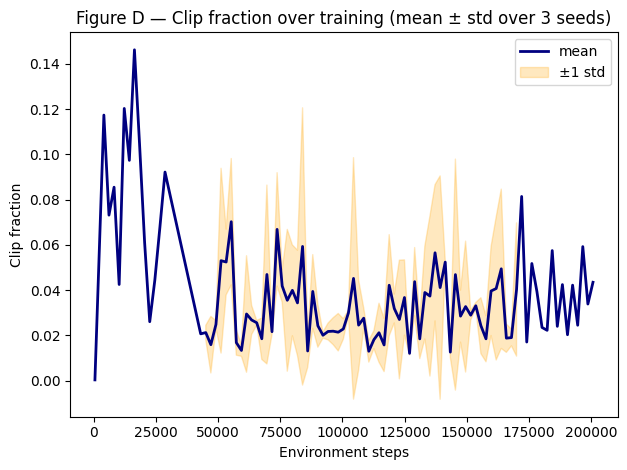

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

metric = "train/clip_fraction"

# make numeric + clean
all_df[metric] = pd.to_numeric(all_df[metric], errors="coerce")
all_df["time/total_timesteps"] = pd.to_numeric(all_df["time/total_timesteps"], errors="coerce")
all_df = all_df.dropna(subset=[metric, "time/total_timesteps", "seed"])

pivot = all_df.pivot_table(index="time/total_timesteps", columns="seed", values=metric)

x = pivot.index.values
mean = pivot.mean(axis=1).values
std  = pivot.std(axis=1).values

plt.figure()
plt.plot(x, mean, color="navy", linewidth=2, label="mean")
plt.fill_between(x, mean-std, mean+std, color="orange", alpha=0.25, label="±1 std")

plt.xlabel("Environment steps")
plt.ylabel("Clip fraction")
plt.title("Figure D — Clip fraction over training (mean ± std over 3 seeds)")
plt.legend()

os.makedirs("figures", exist_ok=True)
plt.tight_layout()
plt.savefig("figures/figure_D.pdf", bbox_inches="tight")
plt.show()

Reading: ppo_cartpole_runs/seed_0/progress.csv
  detected sep = ','
  loaded shape: (14, 16)
Reading: ppo_cartpole_runs/seed_1/progress.csv
  detected sep = ','
  loaded shape: (98, 16)
Reading: ppo_cartpole_runs/seed_2/progress.csv
  detected sep = ','
  loaded shape: (84, 16)

All combined: (196, 17)
Columns (first 30): ['rollout/ep_len_mean', 'time/iterations', 'time/total_timesteps', 'time/fps', 'rollout/ep_rew_mean', 'time/time_elapsed', 'train/policy_gradient_loss', 'train/loss', 'train/explained_variance', 'train/clip_range', 'train/value_loss', 'train/learning_rate', 'train/entropy_loss', 'train/approx_kl', 'train/clip_fraction', 'train/n_updates', 'seed']


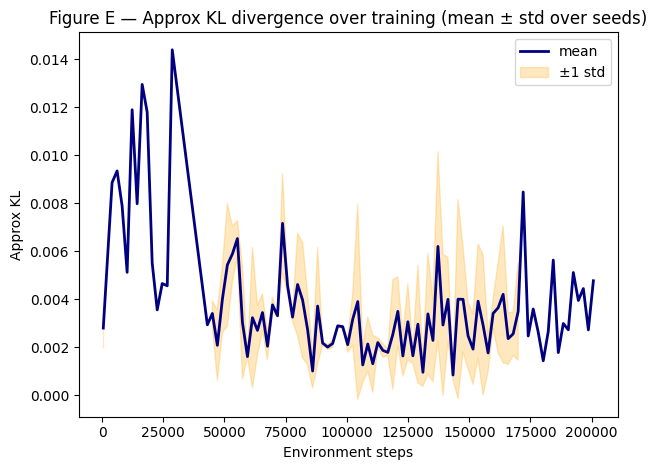

Saved: /Users/laetitiabacha/figures/figure_E.pdf


In [24]:
import os, csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

BASE_DIR = "ppo_cartpole_runs"
SEEDS = [0, 1, 2]
metric = "train/approx_kl"

def read_progress_csv(path):
    # peek at file + auto-detect delimiter
    with open(path, "r", encoding="utf-8-sig", errors="replace") as f:
        sample = f.read(5000)

    try:
        dialect = csv.Sniffer().sniff(sample, delimiters=[",", ";", "\t"])
        sep = dialect.delimiter
    except Exception:
        sep = ","

    print("Reading:", path)
    print("  detected sep =", repr(sep))

    # tolerant parse
    df = pd.read_csv(
        path,
        sep=sep,
        engine="python",
        on_bad_lines="skip",
        encoding="utf-8-sig",
    )
    print("  loaded shape:", df.shape)
    return df

# 1) Load each seed
dfs = []
for s in SEEDS:
    path = os.path.join(BASE_DIR, f"seed_{s}", "progress.csv")
    if not os.path.exists(path):
        raise FileNotFoundError(f"Missing {path}")
    df = read_progress_csv(path)
    df["seed"] = s
    dfs.append(df)

all_df = pd.concat(dfs, ignore_index=True, sort=False)
print("\nAll combined:", all_df.shape)
print("Columns (first 30):", list(all_df.columns)[:30])

# 2) Find a timesteps column (SB3 names vary)
step_candidates = ["time/total_timesteps", "total_timesteps", "timesteps", "step"]
step_col = next((c for c in step_candidates if c in all_df.columns), None)
if step_col is None:
    raise ValueError("Couldn't find a timesteps column. Paste your all_df.columns and I’ll pick it.")

# 3) Check metric exists
if metric not in all_df.columns:
    print("Available train/* columns:", [c for c in all_df.columns if str(c).startswith("train/")][:40])
    raise ValueError(f"'{metric}' not found. Pick one of the available train/* columns above.")

# 4) Clean numeric
all_df[metric] = pd.to_numeric(all_df[metric], errors="coerce")
all_df[step_col] = pd.to_numeric(all_df[step_col], errors="coerce")
all_df = all_df.dropna(subset=[metric, step_col, "seed"])

# 5) Aggregate over seeds + plot
pivot = all_df.pivot_table(index=step_col, columns="seed", values=metric, aggfunc="mean").sort_index()
x = pivot.index.to_numpy()
mean = pivot.mean(axis=1).to_numpy()
std  = pivot.std(axis=1).to_numpy()

os.makedirs("figures", exist_ok=True)

plt.figure()
plt.plot(x, mean, color="navy", linewidth=2, label="mean")
plt.fill_between(x, mean-std, mean+std, color="orange", alpha=0.25, label="±1 std")
plt.xlabel("Environment steps")
plt.ylabel("Approx KL")
plt.title("Figure E — Approx KL divergence over training (mean ± std over seeds)")
plt.legend()
plt.tight_layout()
plt.savefig("figures/figure_E.pdf", bbox_inches="tight")
plt.savefig("figures/figure_E.png", dpi=200, bbox_inches="tight")
plt.show()

print("Saved:", os.path.abspath("figures/figure_E.pdf"))


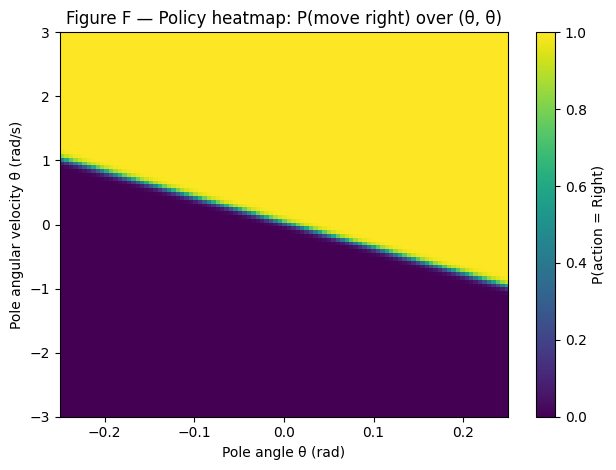

In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from stable_baselines3 import PPO

BASE_DIR = "ppo_cartpole_runs"
seed = 0
model_path = os.path.join(BASE_DIR, f"seed_{seed}", "model.zip")
model = PPO.load(model_path)


# CartPole observation = [x, x_dot, theta, theta_dot]
theta_vals = np.linspace(-0.25, 0.25, 101)       # pole angle
thetadot_vals = np.linspace(-3.0, 3.0, 101)      # pole angular velocity

Z = np.zeros((len(thetadot_vals), len(theta_vals)))

for i, td in enumerate(thetadot_vals):
    for j, th in enumerate(theta_vals):
        obs = np.array([0.0, 0.0, th, td], dtype=np.float32)
        obs_t = torch.tensor(obs).unsqueeze(0)

        dist = model.policy.get_distribution(obs_t)
        probs = dist.distribution.probs.detach().cpu().numpy()[0]  # [P(left), P(right)]
        Z[i, j] = probs[1]  # P(move right)

plt.figure()
plt.imshow(
    Z,
    origin="lower",
    aspect="auto",
    extent=[theta_vals.min(), theta_vals.max(), thetadot_vals.min(), thetadot_vals.max()],
)
plt.colorbar(label="P(action = Right)")
plt.xlabel("Pole angle θ (rad)")
plt.ylabel("Pole angular velocity θ̇ (rad/s)")
plt.title("Figure F — Policy heatmap: P(move right) over (θ, θ̇)")

os.makedirs("figures", exist_ok=True)
plt.tight_layout()
plt.savefig("figures/figure_F.pdf", bbox_inches="tight")
plt.show()

In [3]:
import os
import pandas as pd
import numpy as np

BASE_DIR = "ppo_cartpole_runs"
SEEDS = [0, 1, 2]

dfs = []
for s in SEEDS:
    path = os.path.join(BASE_DIR, f"seed_{s}", "monitor.csv")
    df = pd.read_csv(path, comment="#")  # <- key for monitor.csv
    df["seed"] = s
    df["episode"] = np.arange(len(df))
    dfs.append(df)

all_df = pd.concat(dfs, ignore_index=True)
all_df.head()


,r,l,t,seed,episode
0,18.0,18,3.790893,0,0
1,22.0,22,3.795535,0,1
2,14.0,14,3.798442,0,2
3,13.0,13,3.801124,0,3
4,14.0,14,3.803964,0,4


CWD: /Users/laetitiabacha
Trying to load model: ppo_cartpole_runs/seed_0/model.zip
✅ Model loaded.

▶ Running robustness sweep...
[1/21] theta0 = -0.200
    mean=268.1, std=247.9
[2/21] theta0 = -0.180
    mean=500.0, std=0.0
[3/21] theta0 = -0.160
    mean=500.0, std=0.0
[4/21] theta0 = -0.140
    mean=500.0, std=0.0
[5/21] theta0 = -0.120
    mean=500.0, std=0.0
[6/21] theta0 = -0.100
    mean=500.0, std=0.0
[7/21] theta0 = -0.080
    mean=500.0, std=0.0
[8/21] theta0 = -0.060
    mean=500.0, std=0.0
[9/21] theta0 = -0.040
    mean=500.0, std=0.0
[10/21] theta0 = -0.020
    mean=500.0, std=0.0
[11/21] theta0 = +0.000
    mean=500.0, std=0.0
[12/21] theta0 = +0.020
    mean=500.0, std=0.0
[13/21] theta0 = +0.040
    mean=500.0, std=0.0
[14/21] theta0 = +0.060
    mean=500.0, std=0.0
[15/21] theta0 = +0.080
    mean=500.0, std=0.0
[16/21] theta0 = +0.100
    mean=500.0, std=0.0
[17/21] theta0 = +0.120
    mean=500.0, std=0.0
[18/21] theta0 = +0.140
    mean=500.0, std=0.0
[19/21] theta

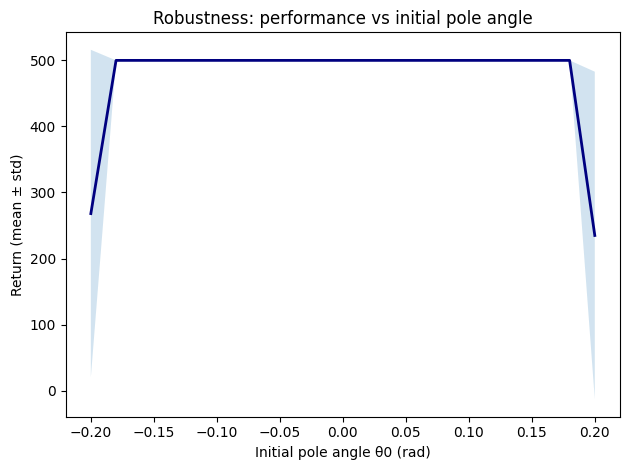

Saved: /Users/laetitiabacha/figures/robustness_theta0.pdf and /Users/laetitiabacha/figures/robustness_theta0.png


In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from stable_baselines3 import PPO

BASE_DIR = "ppo_cartpole_runs"
model_path = os.path.join(BASE_DIR, "seed_0", "model.zip")

print("CWD:", os.getcwd())
print("Trying to load model:", model_path)
if not os.path.exists(model_path):
    # common fix if you're running from a subfolder like ".../figures"
    alt = os.path.join("..", BASE_DIR, "seed_0", "model.zip")
    print("Model not found. Trying:", alt)
    model_path = alt

if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model not found at: {model_path}")

model = PPO.load(model_path)
print("✅ Model loaded.")

def eval_with_initial_theta(model, theta0, n_episodes=50, seed=0, verbose=False):
    env = gym.make("CartPole-v1")
    returns = []

    for k in range(n_episodes):
        obs, _ = env.reset(seed=seed + k)

        # Set initial state: [x, x_dot, theta, theta_dot]
        env.unwrapped.state = np.array([0.0, 0.0, float(theta0), 0.0], dtype=np.float32)

        done = False
        ep_ret = 0.0
        steps = 0

        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, r, terminated, truncated, _ = env.step(int(action))
            done = terminated or truncated
            ep_ret += r
            steps += 1

            # show you're alive during long episodes
            if verbose and steps % 200 == 0:
                print(f"    theta0={theta0:+.3f} ep={k+1}/{n_episodes} steps={steps} return_so_far={ep_ret:.0f}")

        returns.append(ep_ret)

        if verbose:
            print(f"  done: theta0={theta0:+.3f} ep={k+1}/{n_episodes} return={ep_ret:.0f}")

    env.close()
    return float(np.mean(returns)), float(np.std(returns))

# Sweep initial angles
thetas0 = np.linspace(-0.2, 0.2, 21)
means, stds = [], []

print("\n▶ Running robustness sweep...")
for i, th0 in enumerate(thetas0, 1):
    print(f"[{i}/{len(thetas0)}] theta0 = {th0:+.3f}")
    # verbose=True prints within-episode progress; keep False unless you really need it
    m, s = eval_with_initial_theta(model, th0, n_episodes=30, seed=123, verbose=False)
    means.append(m)
    stds.append(s)
    print(f"    mean={m:.1f}, std={s:.1f}")

means = np.array(means)
stds  = np.array(stds)

print("✅ Sweep complete. Plotting...")

os.makedirs("figures", exist_ok=True)

navy = "navy"

# Mean plot
plt.figure()
plt.plot(thetas0, means, color=navy, linewidth=2)
plt.fill_between(thetas0, means-stds, means+stds, alpha=0.2)
plt.xlabel("Initial pole angle θ0 (rad)")
plt.ylabel("Return (mean ± std)")
plt.title("Robustness: performance vs initial pole angle")
plt.tight_layout()
plt.savefig("figures/robustness_theta0.pdf", bbox_inches="tight")
plt.savefig("figures/robustness_theta0.png", dpi=200, bbox_inches="tight")
plt.show()

print("Saved:",
      os.path.abspath("figures/robustness_theta0.pdf"),
      "and",
      os.path.abspath("figures/robustness_theta0.png"))